In [1]:
import pandas as pd
from collections import *
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import RandomizedPCA
from pylab import *

%matplotlib inline

In [2]:
df = pd.read_csv("../../data/meta/Student-Newspapers.csv")
print df.shape

(646, 28)


In [3]:
df.columns

Index([u'Object Unique ID', u'Level', u'File name', u'File use',
       u'Type of Resource', u'Language', u'Title', u'Subtitle', u'Translation',
       u'Variant', u'Variant.1', u'Variant.2', u'Begin date', u'Date:creation',
       u'End date', u'File name 2', u'File use 2', u'Identifier:filename',
       u'Identifier:local', u'Note:local attribution', u'Note:note',
       u'Note:note.1', u'Note:note.2', u'Note:note.3', u'Note:publication',
       u'Note:publication.1', u'Note:series', u'Subject:topic'],
      dtype='object')

In [4]:
df_rel = df[['Object Unique ID', 'Begin date', 'Date:creation', 'End date', 'Title']]
df_rel.head(20)

,Object Unique ID,Begin date,Date:creation,End date,Title
0,http://library.ucsd.edu/ark:/20775/bb8806609v,1977-10-11,"October 11-25, 1977",1977-10-25,The New Indicator
1,http://library.ucsd.edu/ark:/20775/bb2970379j,1978-02-07,"February 7-20, 1978",1978-02-20,The New Indicator
2,http://library.ucsd.edu/ark:/20775/bb60420770,1969-11-12,"November 12, 1969",1969-11-12,The Indicator
3,http://library.ucsd.edu/ark:/20775/bb6519900h,1985-09-25,"September 25, 1985",1985-09-25,The University Report
4,http://library.ucsd.edu/ark:/20775/bb65198992,1986-02-01,February 1986,1986-02-28,California Review
5,http://library.ucsd.edu/ark:/20775/bb4403839b,1983-12-01,Winter 1983,1983-02-28,Revellations
6,http://library.ucsd.edu/ark:/20775/bb8431179p,1982-04-27,"April 27-May 10, 1982",1982-05-10,The New Indicator
7,http://library.ucsd.edu/ark:/20775/bb4813399r,1991-10-30,"October 30, 1991",1991-10-30,Revellations
8,http://library.ucsd.edu/ark:/20775/bb6963590v,1988-02-08,"February 8-22, 1988",1988-02-22,The New Indicator
9,http://library.ucsd.edu/ark:/20775/bb97281184,1977-11-01,November 1977,1977-11-30,Revellations


In [5]:
filenames = ["../../data/Fulltext/Student Newspapers/" + f.split("20775/")[-1] + '-1.pdf.txt' for f in df['Object Unique ID'].tolist()]

In [6]:
print 'We have', len(filenames), 'files'
filenames[:4]

We have 646 files


['../../data/Fulltext/Student Newspapers/bb8806609v-1.pdf.txt',
 '../../data/Fulltext/Student Newspapers/bb2970379j-1.pdf.txt',
 '../../data/Fulltext/Student Newspapers/bb60420770-1.pdf.txt',
 '../../data/Fulltext/Student Newspapers/bb6519900h-1.pdf.txt']

In [7]:
docs = []
for filename in filenames:
    txt = open(filename)
    docs.append(txt.read())

In [8]:
count_vect = CountVectorizer(min_df = 20, analyzer = "word", stop_words="english")
X_train_counts = count_vect.fit_transform(docs)
print X_train_counts.shape

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print X_train_tf.shape

(646, 15948)
(646, 15948)


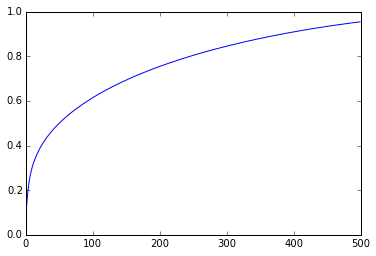

In [9]:
pca = RandomizedPCA(n_components=500)
docs_pca = pca.fit_transform(X_train_tf.todense())

plot(cumsum(pca.explained_variance_ratio_))

In [10]:
sum(pca.explained_variance_ratio_)

0.95398082684335139

In [11]:
docs_pca_df = pd.DataFrame(docs_pca)
docs_pca_df.rename(columns=lambda x: "pc" + str(x), inplace=True)
docs_pca_df.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc490,pc491,pc492,pc493,pc494,pc495,pc496,pc497,pc498,pc499
0,-0.103040,0.154690,0.023626,0.058499,0.110861,0.014541,0.077891,0.045824,-0.082329,-0.089696,...,0.006878,0.006986,0.003729,0.003507,-0.013957,0.012262,0.003063,-0.015051,0.007261,-0.003435
1,-0.108003,0.093470,0.080835,0.103316,-0.021264,0.000796,-0.091882,0.032737,-0.046299,-0.072166,...,-0.011118,-0.003140,-0.001384,-0.005020,0.000677,-0.002693,-0.013463,0.007539,0.005661,-0.003862
2,-0.089421,-0.039497,0.028388,-0.042844,-0.077333,0.167755,0.055386,-0.160144,-0.002400,-0.022883,...,0.016441,0.034011,0.003678,0.014386,-0.016100,-0.013243,0.013574,0.013222,-0.015682,0.017557
3,0.150191,0.023616,-0.009550,-0.024852,-0.096620,-0.003291,0.239341,-0.140584,-0.026438,-0.027645,...,-0.028054,0.021964,0.004387,0.024321,-0.010809,0.001616,0.009735,-0.003045,0.016539,0.019079
4,-0.325232,-0.142480,0.030907,-0.284748,0.020930,0.005006,-0.075783,-0.042590,0.172158,0.046062,...,-0.020117,-0.003886,0.023785,0.052653,-0.013153,0.018103,0.007150,-0.007359,-0.008664,-0.013914


In [12]:
res = df_rel.join(docs_pca_df)
res.head()

,Object Unique ID,Begin date,Date:creation,End date,Title,pc0,pc1,pc2,pc3,pc4,...,pc490,pc491,pc492,pc493,pc494,pc495,pc496,pc497,pc498,pc499
0,http://library.ucsd.edu/ark:/20775/bb8806609v,1977-10-11,"October 11-25, 1977",1977-10-25,The New Indicator,-0.103040,0.154690,0.023626,0.058499,0.110861,...,0.006878,0.006986,0.003729,0.003507,-0.013957,0.012262,0.003063,-0.015051,0.007261,-0.003435
1,http://library.ucsd.edu/ark:/20775/bb2970379j,1978-02-07,"February 7-20, 1978",1978-02-20,The New Indicator,-0.108003,0.093470,0.080835,0.103316,-0.021264,...,-0.011118,-0.003140,-0.001384,-0.005020,0.000677,-0.002693,-0.013463,0.007539,0.005661,-0.003862
2,http://library.ucsd.edu/ark:/20775/bb60420770,1969-11-12,"November 12, 1969",1969-11-12,The Indicator,-0.089421,-0.039497,0.028388,-0.042844,-0.077333,...,0.016441,0.034011,0.003678,0.014386,-0.016100,-0.013243,0.013574,0.013222,-0.015682,0.017557
3,http://library.ucsd.edu/ark:/20775/bb6519900h,1985-09-25,"September 25, 1985",1985-09-25,The University Report,0.150191,0.023616,-0.009550,-0.024852,-0.096620,...,-0.028054,0.021964,0.004387,0.024321,-0.010809,0.001616,0.009735,-0.003045,0.016539,0.019079
4,http://library.ucsd.edu/ark:/20775/bb65198992,1986-02-01,February 1986,1986-02-28,California Review,-0.325232,-0.142480,0.030907,-0.284748,0.020930,...,-0.020117,-0.003886,0.023785,0.052653,-0.013153,0.018103,0.007150,-0.007359,-0.008664,-0.013914


In [13]:
res.to_csv("../../results/student_tfidf.csv")